In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
root_dir = "breast+cancer+wisconsin+diagnostic"

data_filepath = os.path.join(root_dir, "wdbc.data")
names_filepath = os.path.join(root_dir, "wdbc.names")

In [3]:
with open(names_filepath) as f:
    print(f.read())

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

In [4]:
colnames = [
    "ID", "Diagnosis", "Radius1", "Texture1", "Perimeter1", "Area1", "Smoothness1", "Compactness1", "Concavity1",
    "Concave_points1", "Symmetry1", "Fractal_dimension1", "Radius2", "Texture2", "Perimeter2", "Area2", "Smoothness2",
    "Compactness2", "Concavity2", "Concave_points2", "Symmetry2", "Fractal_dimension2", "Radius3", "Texture3", "Perimeter3",
    "Area3", "Smoothness3", "Compactness3", "Concavity3", "Concave_points3", "Symmetry3", "Fractal_dimension3"
    ]

In [5]:
df = pd.read_csv(data_filepath, names=colnames)
df.head()

,ID,Diagnosis,Radius1,Texture1,Perimeter1,Area1,Smoothness1,Compactness1,Concavity1,Concave_points1,...,Radius3,Texture3,Perimeter3,Area3,Smoothness3,Compactness3,Concavity3,Concave_points3,Symmetry3,Fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df = df.drop("ID", axis=1)
df["Diagnosis"].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
df["Diagnosis"] = df["Diagnosis"].map({"B": 0, "M": 1})

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           569 non-null    int64  
 1   Radius1             569 non-null    float64
 2   Texture1            569 non-null    float64
 3   Perimeter1          569 non-null    float64
 4   Area1               569 non-null    float64
 5   Smoothness1         569 non-null    float64
 6   Compactness1        569 non-null    float64
 7   Concavity1          569 non-null    float64
 8   Concave_points1     569 non-null    float64
 9   Symmetry1           569 non-null    float64
 10  Fractal_dimension1  569 non-null    float64
 11  Radius2             569 non-null    float64
 12  Texture2            569 non-null    float64
 13  Perimeter2          569 non-null    float64
 14  Area2               569 non-null    float64
 15  Smoothness2         569 non-null    float64
 16  Compactn

In [9]:
print("Total Missing values:", df.isnull().sum().sum())

Total Missing values: 0


### Frequency Analysis

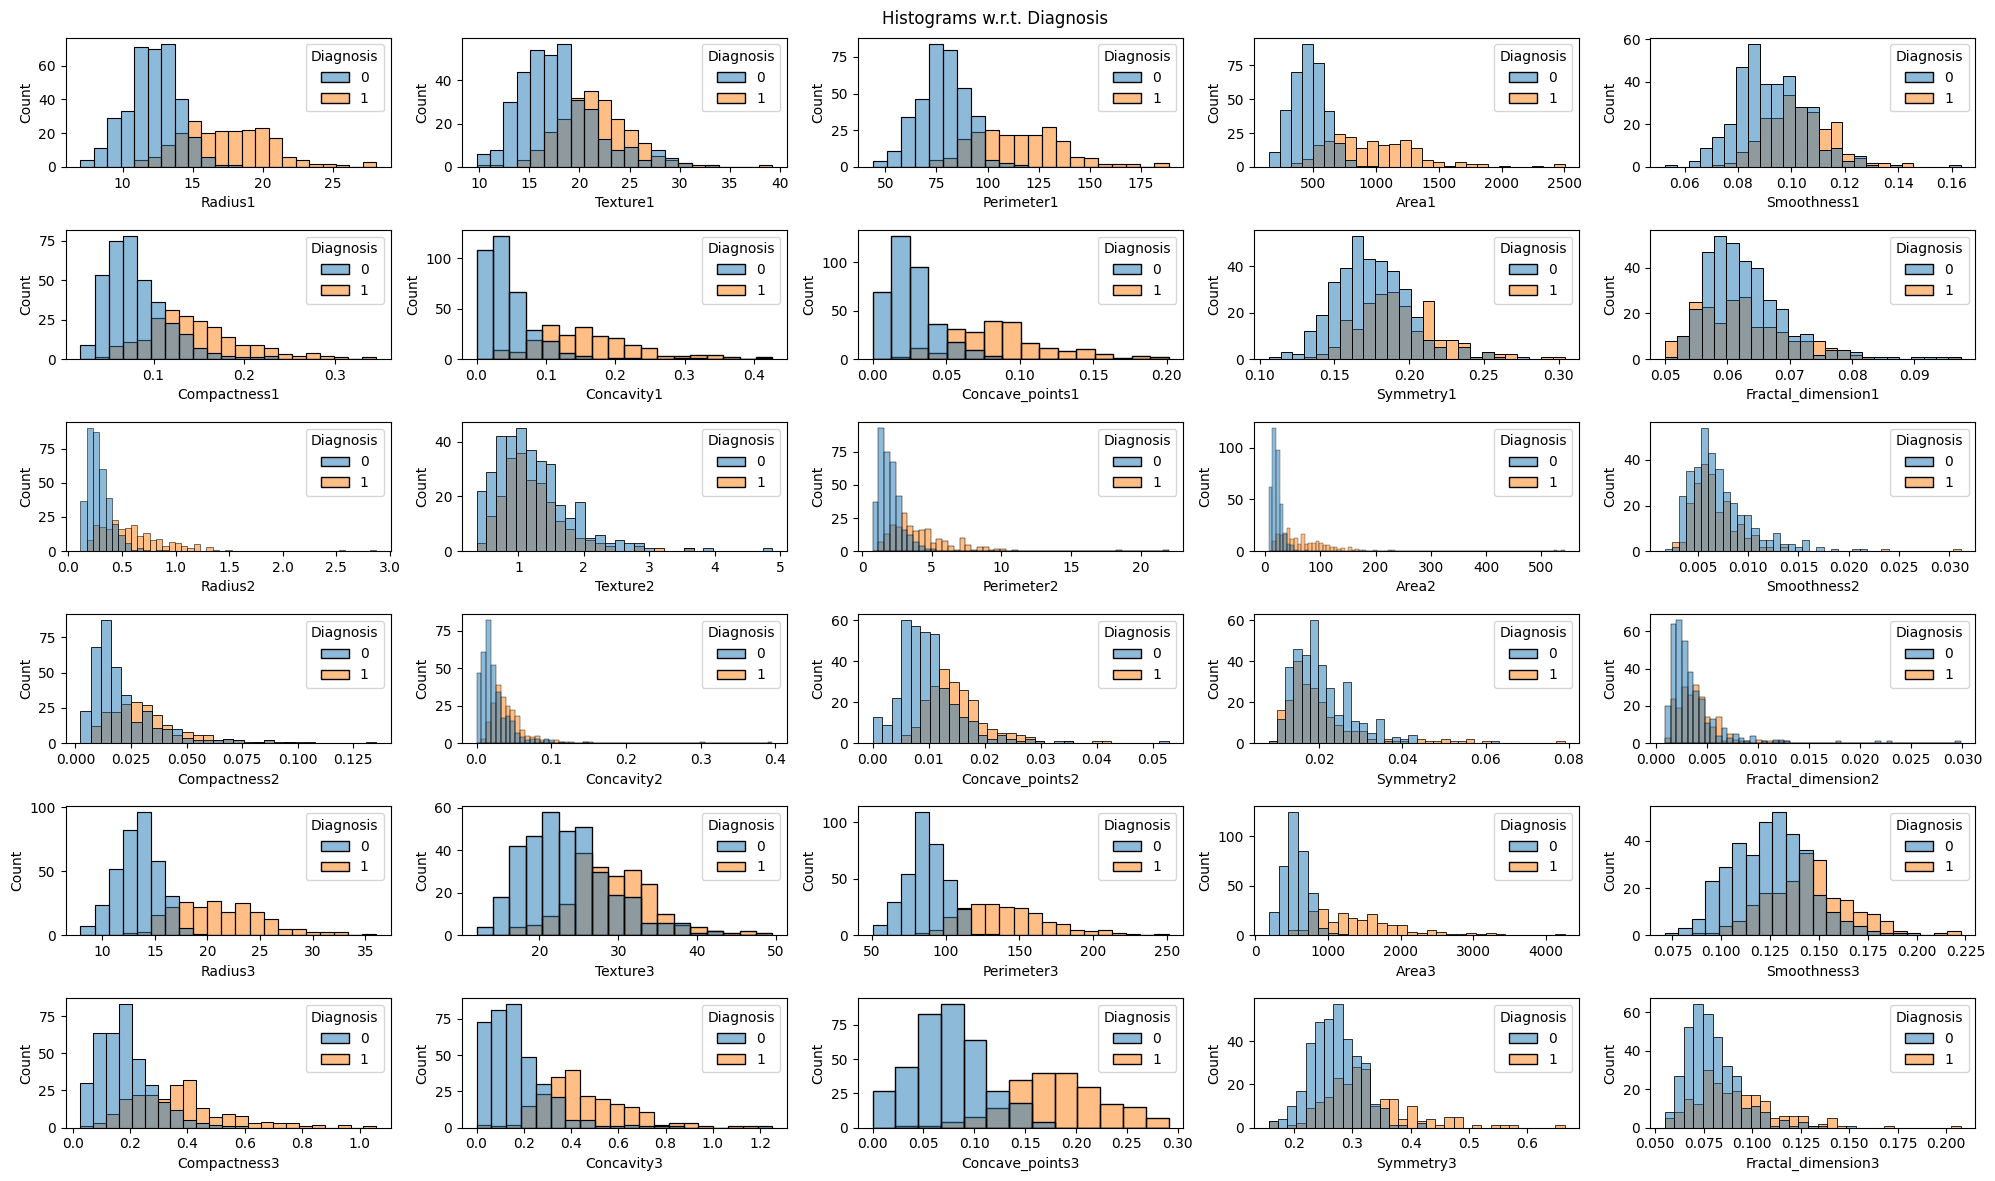

In [10]:
fig = plt.figure(figsize=(20, 12))
for i, col in enumerate(df.columns[1:], 1):
    plt.subplot(6, 5, i)
    sns.histplot(data=df, x=col, hue="Diagnosis")

plt.suptitle("Histograms w.r.t. Diagnosis")
plt.tight_layout()

### Outlier Analysis

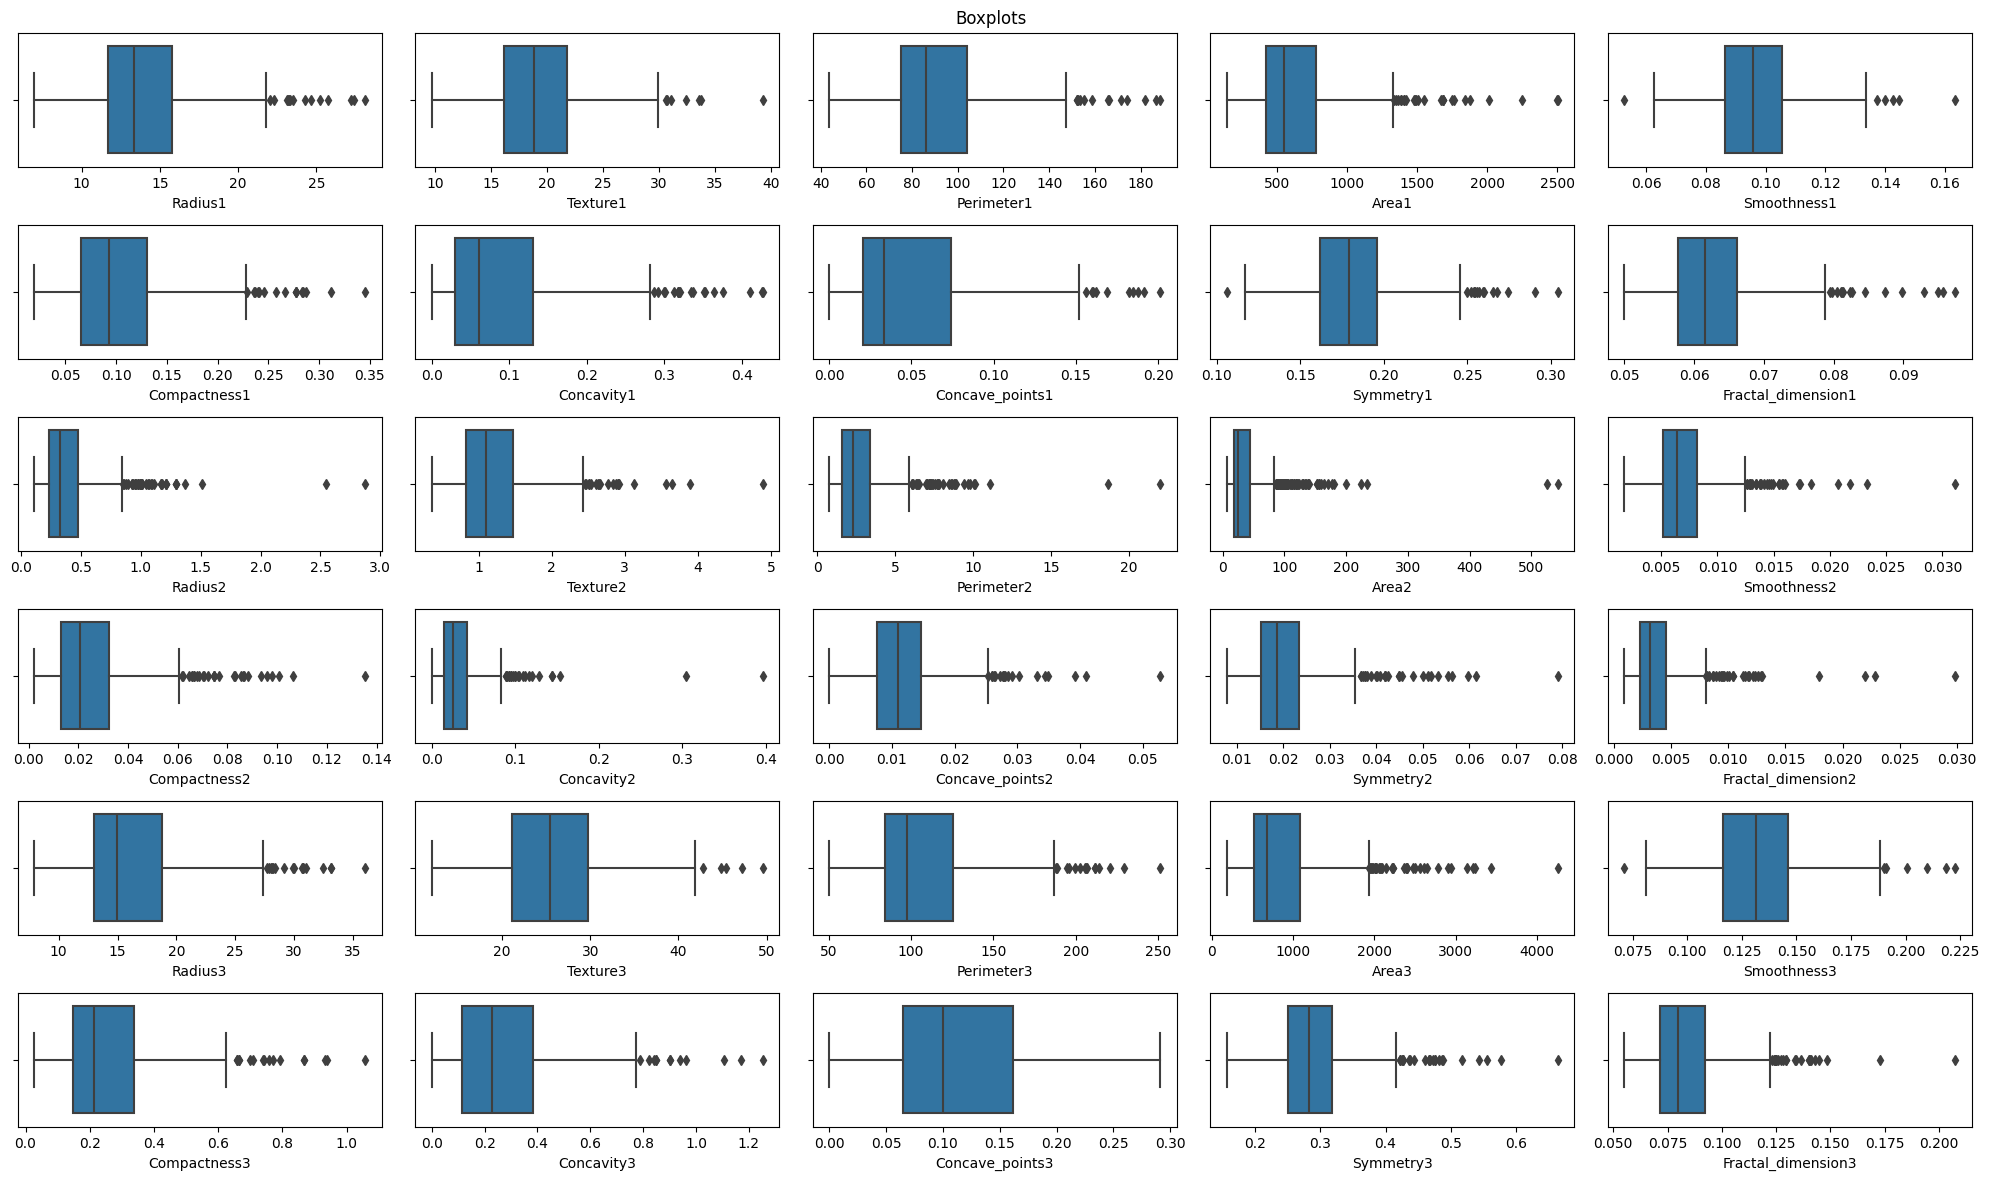

In [11]:
fig = plt.figure(figsize=(20, 12))
for i, col in enumerate(df.columns[1:], 1):
    plt.subplot(6, 5, i)
    sns.boxplot(data=df, x=col)

plt.suptitle("Boxplots")
plt.tight_layout()

### Correlations

Text(0.5, 1.0, 'Correlation Heatmap')

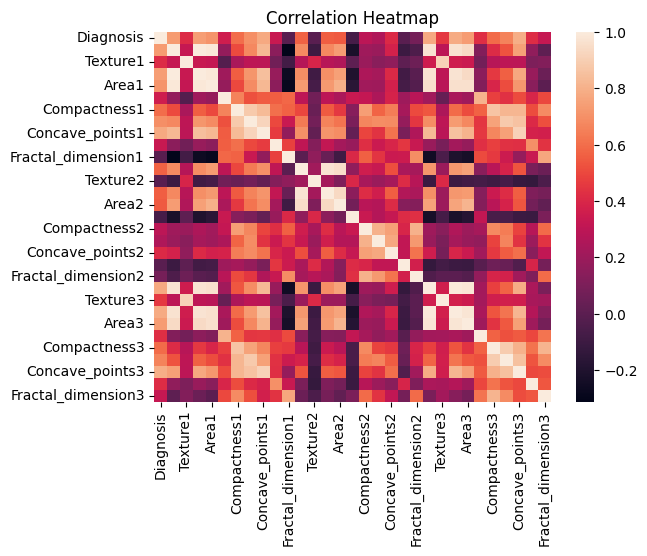

In [12]:
sns.heatmap(df.corr())
plt.title("Correlation Heatmap")

Text(0.5, 1.0, 'Correlation w.r.t Diagnosis')

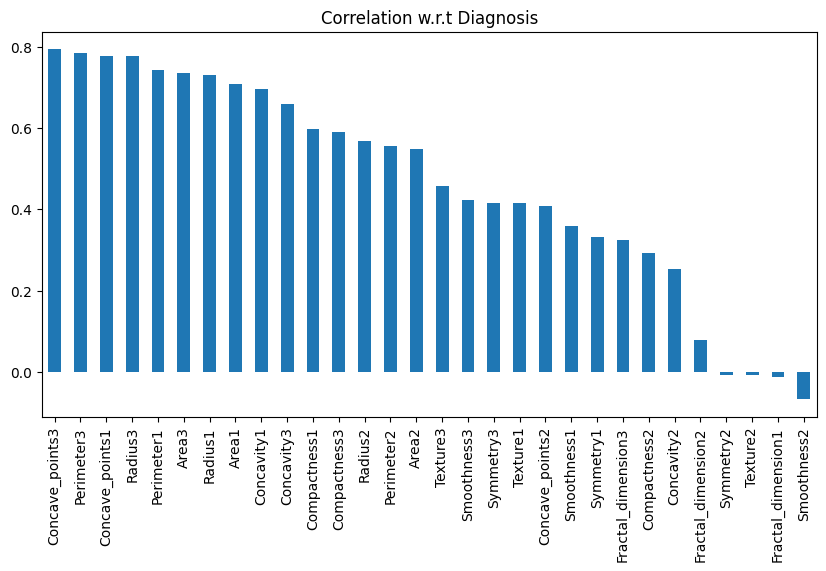

In [13]:
plt.figure(figsize=(10, 5))
df.corr()["Diagnosis"][1:].sort_values(ascending=False).plot(kind="bar")
plt.title("Correlation w.r.t Diagnosis")

In [14]:
train_set = df.sample(frac=0.8)
val_set = df.drop(train_set.index)

print("Train set shape:", train_set.shape)
print("Valid set shape:", val_set.shape)

Train set shape: (455, 31)
Valid set shape: (114, 31)


In [15]:
X_train = train_set.drop("Diagnosis", axis=1)
y_train = train_set["Diagnosis"].copy()

X_val = val_set.drop("Diagnosis", axis=1)
y_val = val_set["Diagnosis"].copy()

### Modelling

In [16]:
import torch
from torch import nn
from torch import optim
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import ConfusionMatrixDisplay

torch.manual_seed(5)

In [17]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [18]:
X_train_tensor = torch.Tensor(X_train_scaled)
y_train_tensor = torch.Tensor(y_train.to_numpy()).view(-1, 1)
X_val_tensor = torch.Tensor(X_val_scaled)
y_val_tensor = torch.Tensor(y_val.to_numpy()).view(-1, 1)

In [19]:
class BreastCancerClassifier(nn.Module):
    def __init__(self, n_inputs=30, n_outputs=1):
        super().__init__()
        self.fc1 = nn.Linear(in_features=n_inputs, out_features=100)
        self.fc2 = nn.Linear(in_features=100, out_features=50)
        self.fc3 = nn.Linear(in_features=50, out_features=10)
        self.fc4 = nn.Linear(in_features=10, out_features=n_outputs)
    
    def forward(self, x):
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        x = nn.ReLU()(x)
        x = self.fc3(x)
        x = nn.ReLU()(x)
        x = self.fc4(x)
        x = nn.Sigmoid()(x)
        return x

In [20]:
def train(model, n_epochs, criterion, optimizer, print_interval):
    metrics = {"loss": [], "accuracy": [], "val_loss": [], "val_accuracy": []}
    for epoch in range(n_epochs + 1):
        # TRAIN
        model.train()
        y_preds = model(X_train_tensor)
        loss = criterion(y_preds, y_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        metrics["loss"].append(loss.item())
        accuracy = (y_preds.round() == y_train_tensor).float().mean()
        metrics["accuracy"].append(accuracy.item())
        if epoch % print_interval == 0:
            print(f"[EPOCH {epoch:03d}] Loss: {loss.item():.02f} Accuracy: {accuracy:.02f}", end=" | ")
    
        # EVALUATE
        model.eval()
        with torch.no_grad():
            y_val_preds = model(X_val_tensor)
            val_loss = criterion(y_val_preds, y_val_tensor)

        metrics["val_loss"].append(val_loss.item())
        val_accuracy = (y_val_preds.round() == y_val_tensor).float().mean()
        metrics["val_accuracy"].append(val_accuracy.item())
        if epoch % print_interval == 0:
            print(f"Val Loss: {val_loss.item():.02f} Val Accuracy: {val_accuracy:.02f}")
        
    return (metrics, y_preds, y_val_preds)

In [21]:
def plot_confusion_matrix(y_preds, y_val_preds):
    fig, ax = plt.subplots(ncols=2)
    fig.set_size_inches(10, 4)
    ConfusionMatrixDisplay.from_predictions(y_train_tensor.round().detach().numpy().reshape(-1),
                                            y_preds.round().detach().numpy().reshape(-1),
                                            ax=ax[0], colorbar=False)
    ax[0].set_title("Training")
    ConfusionMatrixDisplay.from_predictions(y_val_tensor.round().detach().numpy().reshape(-1),
                                            y_val_preds.round().detach().numpy().reshape(-1),
                                            ax=ax[1], colorbar=False)
    ax[1].set_title("Validation")
    return plt

### Learning rate 0.1 - Epochs 100

In [22]:
lr = 0.1
n_epochs = 100
print_interval = 10


model = BreastCancerClassifier(n_inputs=X_train.shape[1], n_outputs=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

metrics, y_preds, y_val_preds = train(model, n_epochs, criterion, optimizer, print_interval)

[EPOCH 000] Loss: 0.68 Accuracy: 0.61 | Val Loss: 1.86 Val Accuracy: 0.69
[EPOCH 010] Loss: 0.09 Accuracy: 0.97 | Val Loss: 0.07 Val Accuracy: 0.96
[EPOCH 020] Loss: 0.04 Accuracy: 0.98 | Val Loss: 0.11 Val Accuracy: 0.97
[EPOCH 030] Loss: 0.02 Accuracy: 0.99 | Val Loss: 0.23 Val Accuracy: 0.96
[EPOCH 040] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.32 Val Accuracy: 0.96
[EPOCH 050] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.48 Val Accuracy: 0.96
[EPOCH 060] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.54 Val Accuracy: 0.96
[EPOCH 070] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.59 Val Accuracy: 0.96
[EPOCH 080] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.61 Val Accuracy: 0.96
[EPOCH 090] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.62 Val Accuracy: 0.96
[EPOCH 100] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.62 Val Accuracy: 0.96


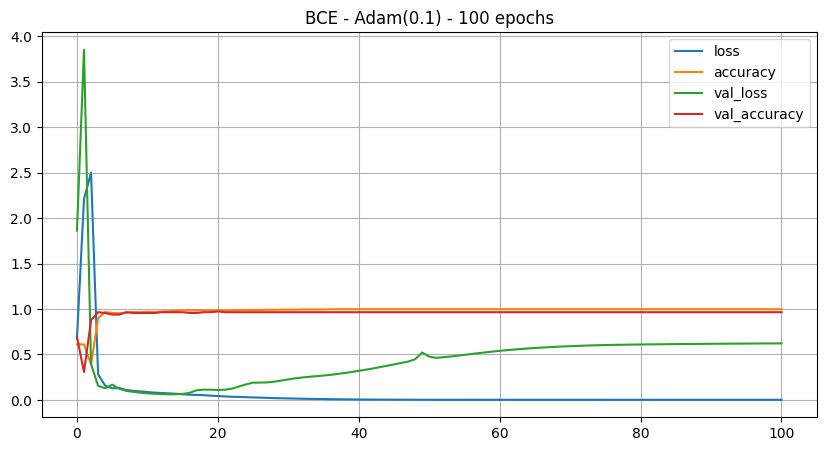

In [23]:
pd.DataFrame(metrics).plot(figsize=(10, 5))
plt.title(f"BCE - Adam({lr}) - {n_epochs} epochs")
plt.grid("on")

Text(0.5, 0.98, 'BCE - Adam(0.1) - 100 epochs')

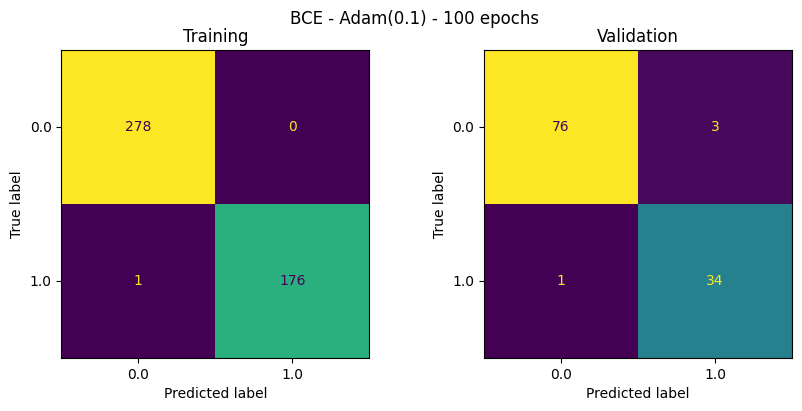

In [24]:
plot_confusion_matrix(y_preds, y_val_preds)
plt.suptitle(f"BCE - Adam({lr}) - {n_epochs} epochs")

### Learning rate 0.01 - Epochs 100

In [25]:
lr = 0.01
n_epochs = 100
print_interval = 10

model = BreastCancerClassifier(n_inputs=X_train.shape[1], n_outputs=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

metrics, y_preds, y_val_preds = train(model, n_epochs, criterion, optimizer, print_interval)

[EPOCH 000] Loss: 0.68 Accuracy: 0.61 | Val Loss: 0.61 Val Accuracy: 0.70
[EPOCH 010] Loss: 0.08 Accuracy: 0.97 | Val Loss: 0.10 Val Accuracy: 0.96
[EPOCH 020] Loss: 0.03 Accuracy: 0.99 | Val Loss: 0.15 Val Accuracy: 0.97
[EPOCH 030] Loss: 0.01 Accuracy: 1.00 | Val Loss: 0.21 Val Accuracy: 0.97
[EPOCH 040] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.32 Val Accuracy: 0.96
[EPOCH 050] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.43 Val Accuracy: 0.96
[EPOCH 060] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.50 Val Accuracy: 0.96
[EPOCH 070] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.54 Val Accuracy: 0.96
[EPOCH 080] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.56 Val Accuracy: 0.96
[EPOCH 090] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.58 Val Accuracy: 0.96
[EPOCH 100] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.59 Val Accuracy: 0.96


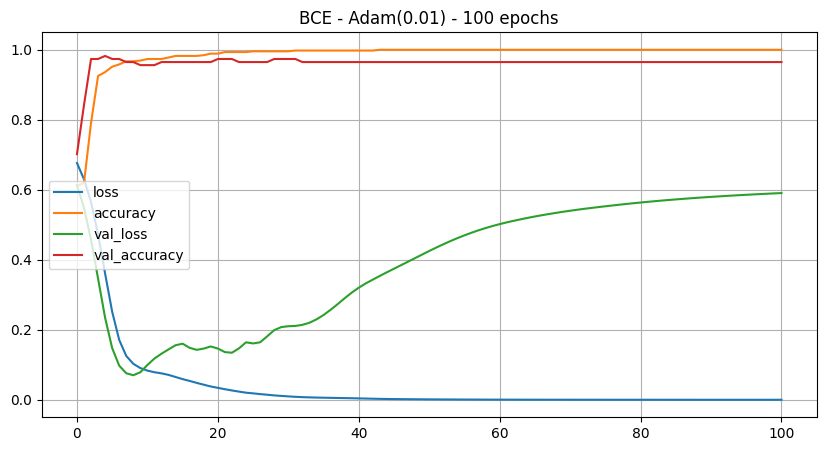

In [26]:
pd.DataFrame(metrics).plot(figsize=(10, 5))
plt.title(f"BCE - Adam({lr}) - {n_epochs} epochs")
plt.grid("on")

Text(0.5, 0.98, 'BCE - Adam(0.01) - 100 epochs')

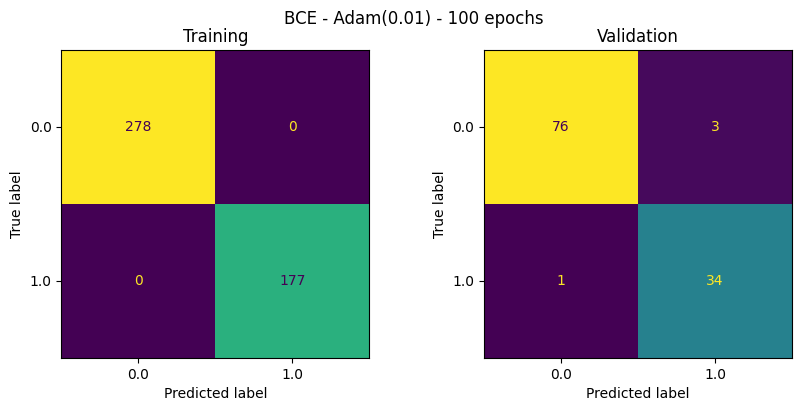

In [27]:
plot_confusion_matrix(y_preds, y_val_preds)
plt.suptitle(f"BCE - Adam({lr}) - {n_epochs} epochs")

### Learning rate 0.001 - Epochs 100

In [28]:
lr = 0.001
n_epochs = 100
print_interval = 10

model = BreastCancerClassifier(n_inputs=X_train.shape[1], n_outputs=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

metrics, y_preds, y_val_preds = train(model, n_epochs, criterion, optimizer, print_interval)

[EPOCH 000] Loss: 0.68 Accuracy: 0.61 | Val Loss: 0.66 Val Accuracy: 0.69
[EPOCH 010] Loss: 0.62 Accuracy: 0.66 | Val Loss: 0.59 Val Accuracy: 0.73
[EPOCH 020] Loss: 0.52 Accuracy: 0.90 | Val Loss: 0.49 Val Accuracy: 0.96
[EPOCH 030] Loss: 0.36 Accuracy: 0.94 | Val Loss: 0.33 Val Accuracy: 0.97
[EPOCH 040] Loss: 0.21 Accuracy: 0.96 | Val Loss: 0.19 Val Accuracy: 0.97
[EPOCH 050] Loss: 0.13 Accuracy: 0.97 | Val Loss: 0.11 Val Accuracy: 0.96
[EPOCH 060] Loss: 0.10 Accuracy: 0.98 | Val Loss: 0.08 Val Accuracy: 0.96
[EPOCH 070] Loss: 0.08 Accuracy: 0.98 | Val Loss: 0.08 Val Accuracy: 0.96
[EPOCH 080] Loss: 0.06 Accuracy: 0.98 | Val Loss: 0.08 Val Accuracy: 0.96
[EPOCH 090] Loss: 0.05 Accuracy: 0.98 | Val Loss: 0.09 Val Accuracy: 0.96
[EPOCH 100] Loss: 0.04 Accuracy: 0.98 | Val Loss: 0.10 Val Accuracy: 0.96


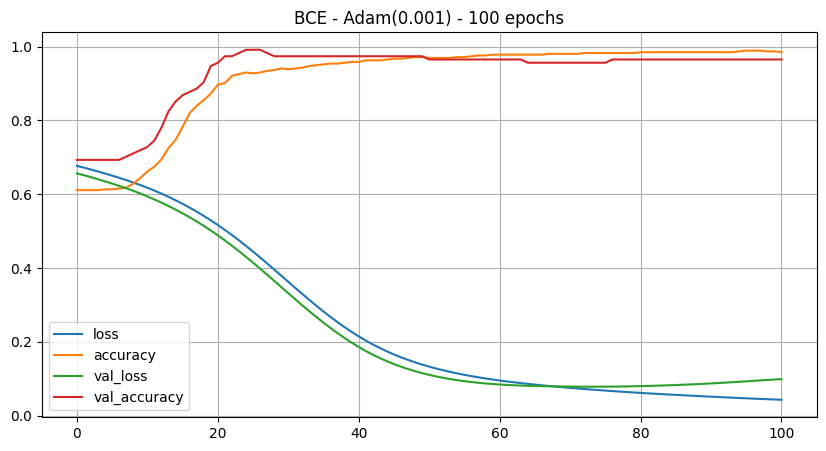

In [29]:
pd.DataFrame(metrics).plot(figsize=(10, 5))
plt.title(f"BCE - Adam({lr}) - {n_epochs} epochs")
plt.grid("on")

Text(0.5, 0.98, 'BCE - Adam(0.001) - 100 epochs')

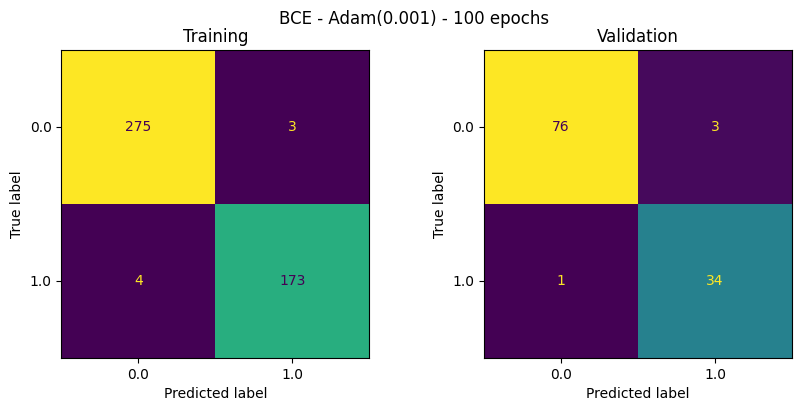

In [30]:
plot_confusion_matrix(y_preds, y_val_preds)
plt.suptitle(f"BCE - Adam({lr}) - {n_epochs} epochs")

### Learning rate 0.1 - Epochs 500

In [31]:
lr = 0.1
n_epochs = 500
print_interval = 50

model = BreastCancerClassifier(n_inputs=X_train.shape[1], n_outputs=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

metrics, y_preds, y_val_preds = train(model, n_epochs, criterion, optimizer, print_interval)

[EPOCH 000] Loss: 0.68 Accuracy: 0.61 | Val Loss: 1.86 Val Accuracy: 0.69
[EPOCH 050] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.48 Val Accuracy: 0.96
[EPOCH 100] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.62 Val Accuracy: 0.96
[EPOCH 150] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.65 Val Accuracy: 0.96
[EPOCH 200] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.67 Val Accuracy: 0.96
[EPOCH 250] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.69 Val Accuracy: 0.96
[EPOCH 300] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.72 Val Accuracy: 0.96
[EPOCH 350] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.78 Val Accuracy: 0.96
[EPOCH 400] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.79 Val Accuracy: 0.96
[EPOCH 450] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.79 Val Accuracy: 0.96
[EPOCH 500] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.80 Val Accuracy: 0.96


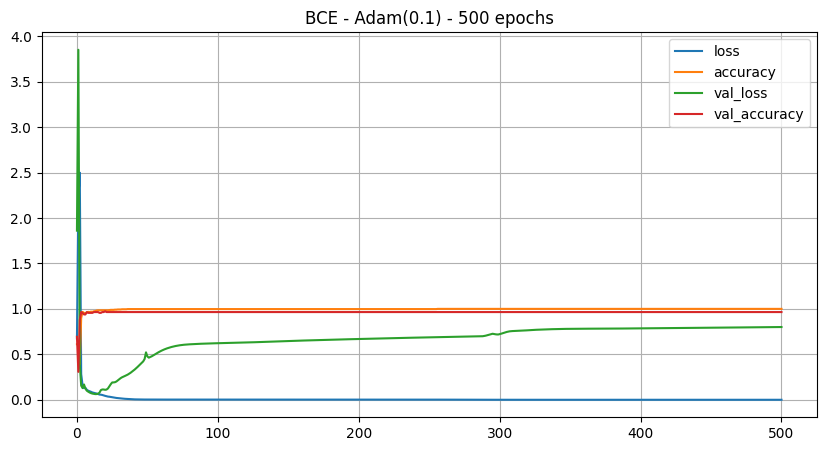

In [32]:
pd.DataFrame(metrics).plot(figsize=(10, 5))
plt.title(f"BCE - Adam({lr}) - {n_epochs} epochs")
plt.grid("on")

Text(0.5, 0.98, 'BCE - Adam(0.1) - 500 epochs')

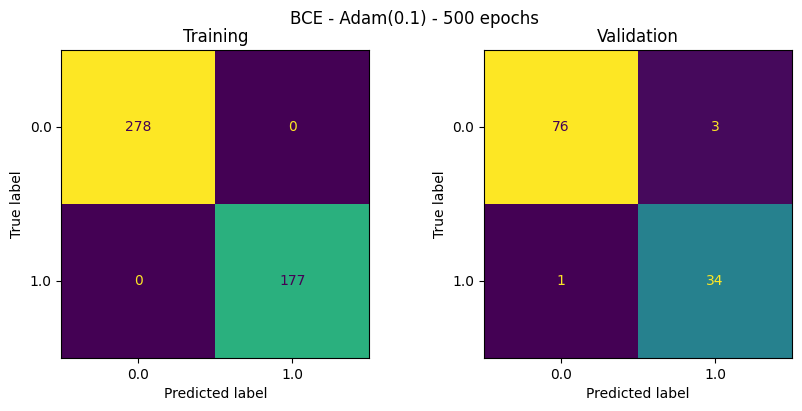

In [33]:
plot_confusion_matrix(y_preds, y_val_preds)
plt.suptitle(f"BCE - Adam({lr}) - {n_epochs} epochs")

### Learning rate 0.01 - Epochs 500

In [34]:
lr = 0.01
n_epochs = 500
print_interval = 50

model = BreastCancerClassifier(n_inputs=X_train.shape[1], n_outputs=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

metrics, y_preds, y_val_preds = train(model, n_epochs, criterion, optimizer, print_interval)

[EPOCH 000] Loss: 0.68 Accuracy: 0.61 | Val Loss: 0.61 Val Accuracy: 0.70
[EPOCH 050] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.43 Val Accuracy: 0.96
[EPOCH 100] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.59 Val Accuracy: 0.96
[EPOCH 150] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.62 Val Accuracy: 0.96
[EPOCH 200] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.64 Val Accuracy: 0.96
[EPOCH 250] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.66 Val Accuracy: 0.96
[EPOCH 300] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.68 Val Accuracy: 0.96
[EPOCH 350] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.69 Val Accuracy: 0.96
[EPOCH 400] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.70 Val Accuracy: 0.96
[EPOCH 450] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.71 Val Accuracy: 0.96
[EPOCH 500] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.72 Val Accuracy: 0.96


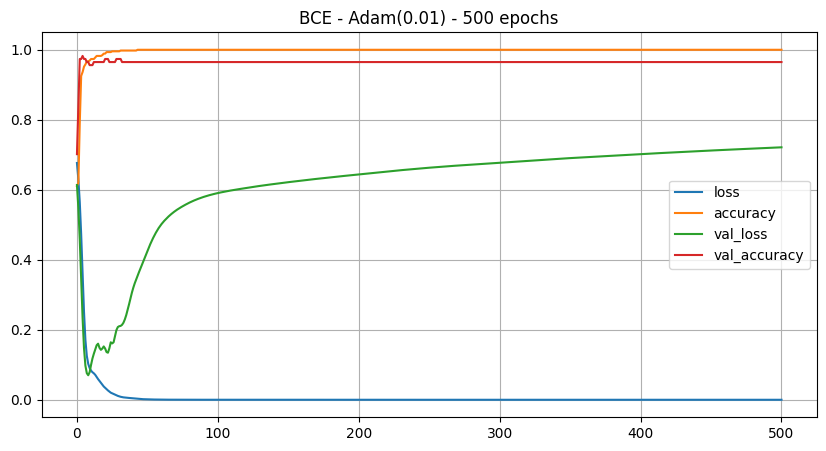

In [35]:
pd.DataFrame(metrics).plot(figsize=(10, 5))
plt.title(f"BCE - Adam({lr}) - {n_epochs} epochs")
plt.grid("on")

Text(0.5, 0.98, 'BCE - Adam(0.01) - 500 epochs')

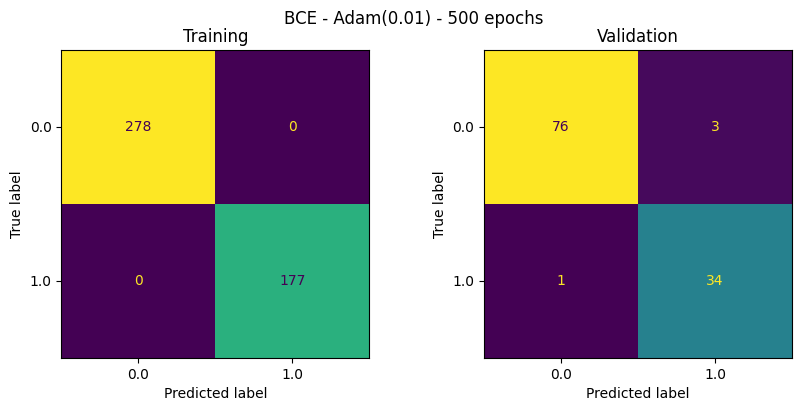

In [36]:
plot_confusion_matrix(y_preds, y_val_preds)
plt.suptitle(f"BCE - Adam({lr}) - {n_epochs} epochs")

### Learning rate 0.001 - Epochs 500

In [37]:
lr = 0.001
n_epochs = 500
print_interval = 50

model = BreastCancerClassifier(n_inputs=X_train.shape[1], n_outputs=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

metrics, y_preds, y_val_preds = train(model, n_epochs, criterion, optimizer, print_interval)

[EPOCH 000] Loss: 0.68 Accuracy: 0.61 | Val Loss: 0.66 Val Accuracy: 0.69
[EPOCH 050] Loss: 0.13 Accuracy: 0.97 | Val Loss: 0.11 Val Accuracy: 0.96
[EPOCH 100] Loss: 0.04 Accuracy: 0.98 | Val Loss: 0.10 Val Accuracy: 0.96
[EPOCH 150] Loss: 0.02 Accuracy: 1.00 | Val Loss: 0.16 Val Accuracy: 0.96
[EPOCH 200] Loss: 0.01 Accuracy: 1.00 | Val Loss: 0.23 Val Accuracy: 0.96
[EPOCH 250] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.27 Val Accuracy: 0.96
[EPOCH 300] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.30 Val Accuracy: 0.96
[EPOCH 350] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.33 Val Accuracy: 0.96
[EPOCH 400] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.34 Val Accuracy: 0.96
[EPOCH 450] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.36 Val Accuracy: 0.96
[EPOCH 500] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.38 Val Accuracy: 0.96


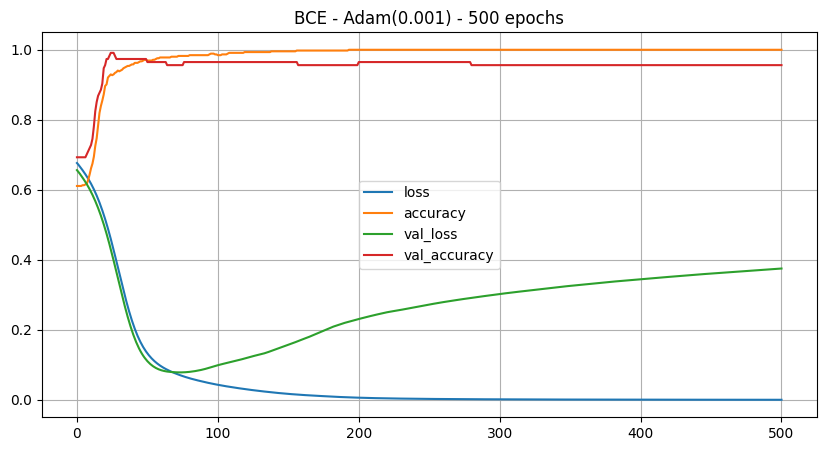

In [38]:
pd.DataFrame(metrics).plot(figsize=(10, 5))
plt.title(f"BCE - Adam({lr}) - {n_epochs} epochs")
plt.grid("on")

Text(0.5, 0.98, 'BCE - Adam(0.001) - 500 epochs')

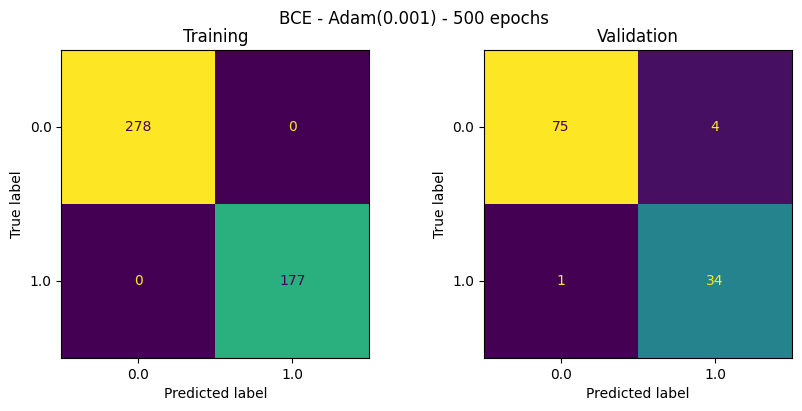

In [39]:
plot_confusion_matrix(y_preds, y_val_preds)
plt.suptitle(f"BCE - Adam({lr}) - {n_epochs} epochs")

### Learning rate 0.1 - Epochs 1000

In [40]:
lr = 0.1
n_epochs = 1000
print_interval = 100

model = BreastCancerClassifier(n_inputs=X_train.shape[1], n_outputs=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

metrics, y_preds, y_val_preds = train(model, n_epochs, criterion, optimizer, print_interval)

[EPOCH 000] Loss: 0.68 Accuracy: 0.61 | Val Loss: 1.86 Val Accuracy: 0.69
[EPOCH 100] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.62 Val Accuracy: 0.96
[EPOCH 200] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.67 Val Accuracy: 0.96
[EPOCH 300] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.72 Val Accuracy: 0.96
[EPOCH 400] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.79 Val Accuracy: 0.96
[EPOCH 500] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.80 Val Accuracy: 0.96
[EPOCH 600] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.82 Val Accuracy: 0.96
[EPOCH 700] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.83 Val Accuracy: 0.96
[EPOCH 800] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.84 Val Accuracy: 0.96
[EPOCH 900] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.85 Val Accuracy: 0.96
[EPOCH 1000] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.87 Val Accuracy: 0.96


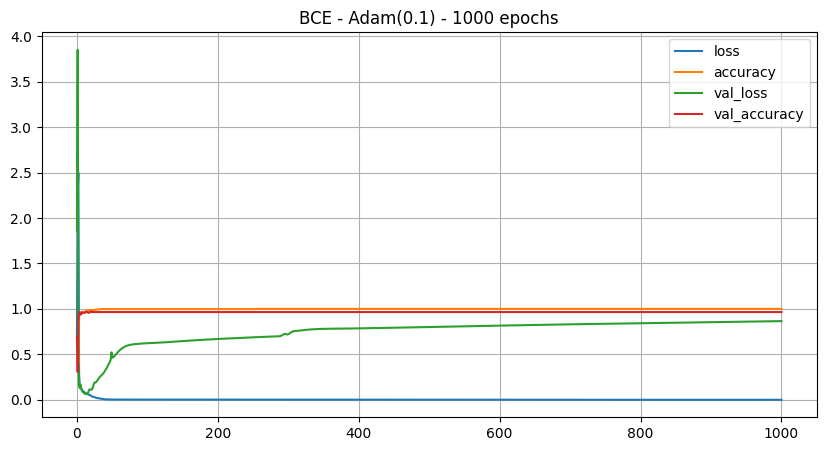

In [41]:
pd.DataFrame(metrics).plot(figsize=(10, 5))
plt.title(f"BCE - Adam({lr}) - {n_epochs} epochs")
plt.grid("on")

Text(0.5, 0.98, 'BCE - Adam(0.1) - 1000 epochs')

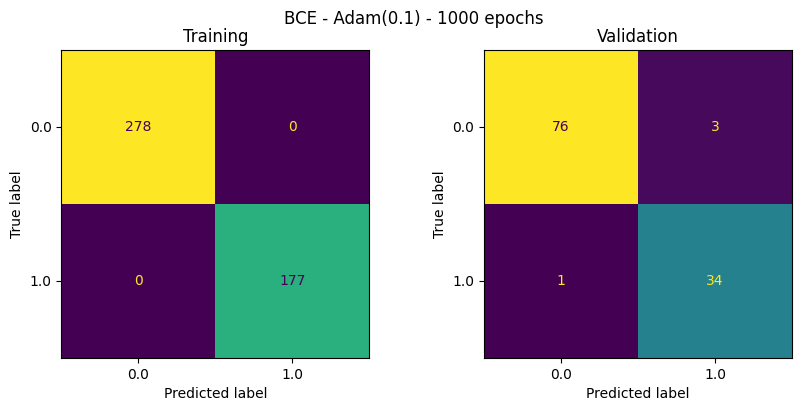

In [42]:
plot_confusion_matrix(y_preds, y_val_preds)
plt.suptitle(f"BCE - Adam({lr}) - {n_epochs} epochs")

### Learning rate 0.01 - Epochs 1000

In [43]:
lr = 0.01
n_epochs = 1000
print_interval = 100

model = BreastCancerClassifier(n_inputs=X_train.shape[1], n_outputs=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

metrics, y_preds, y_val_preds = train(model, n_epochs, criterion, optimizer, print_interval)

[EPOCH 000] Loss: 0.68 Accuracy: 0.61 | Val Loss: 0.61 Val Accuracy: 0.70
[EPOCH 100] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.59 Val Accuracy: 0.96
[EPOCH 200] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.64 Val Accuracy: 0.96
[EPOCH 300] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.68 Val Accuracy: 0.96
[EPOCH 400] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.70 Val Accuracy: 0.96
[EPOCH 500] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.72 Val Accuracy: 0.96
[EPOCH 600] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.74 Val Accuracy: 0.96
[EPOCH 700] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.75 Val Accuracy: 0.96
[EPOCH 800] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.77 Val Accuracy: 0.96
[EPOCH 900] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.78 Val Accuracy: 0.96
[EPOCH 1000] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.79 Val Accuracy: 0.96


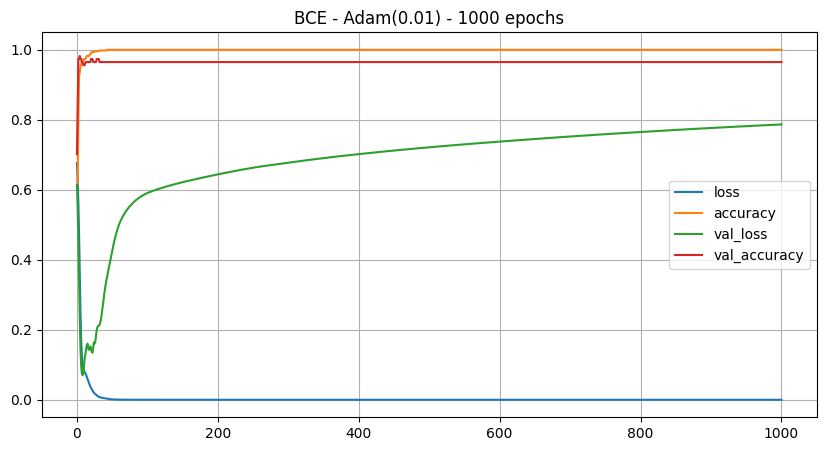

In [44]:
pd.DataFrame(metrics).plot(figsize=(10, 5))
plt.title(f"BCE - Adam({lr}) - {n_epochs} epochs")
plt.grid("on")

Text(0.5, 0.98, 'BCE - Adam(0.01) - 1000 epochs')

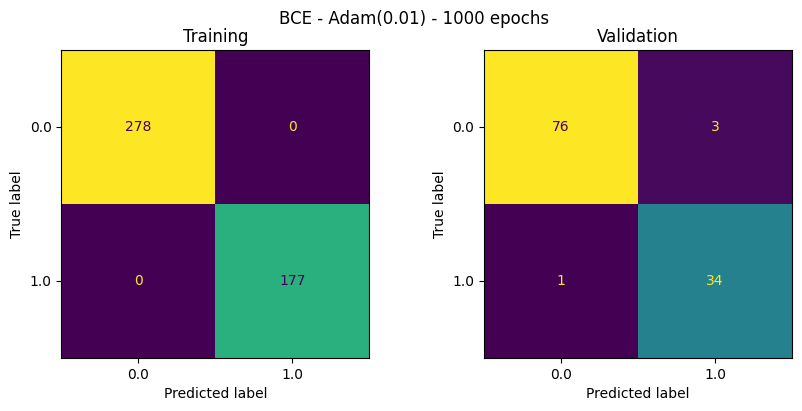

In [45]:
plot_confusion_matrix(y_preds, y_val_preds)
plt.suptitle(f"BCE - Adam({lr}) - {n_epochs} epochs")

### Learning rate 0.001 - Epochs 1000

In [46]:
lr = 0.001
n_epochs = 1000
print_interval = 100

model = BreastCancerClassifier(n_inputs=X_train.shape[1], n_outputs=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

metrics, y_preds, y_val_preds = train(model, n_epochs, criterion, optimizer, print_interval)

[EPOCH 000] Loss: 0.68 Accuracy: 0.61 | Val Loss: 0.66 Val Accuracy: 0.69
[EPOCH 100] Loss: 0.04 Accuracy: 0.98 | Val Loss: 0.10 Val Accuracy: 0.96
[EPOCH 200] Loss: 0.01 Accuracy: 1.00 | Val Loss: 0.23 Val Accuracy: 0.96
[EPOCH 300] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.30 Val Accuracy: 0.96
[EPOCH 400] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.34 Val Accuracy: 0.96
[EPOCH 500] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.38 Val Accuracy: 0.96
[EPOCH 600] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.40 Val Accuracy: 0.96
[EPOCH 700] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.42 Val Accuracy: 0.96
[EPOCH 800] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.44 Val Accuracy: 0.96
[EPOCH 900] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.47 Val Accuracy: 0.96
[EPOCH 1000] Loss: 0.00 Accuracy: 1.00 | Val Loss: 0.48 Val Accuracy: 0.96


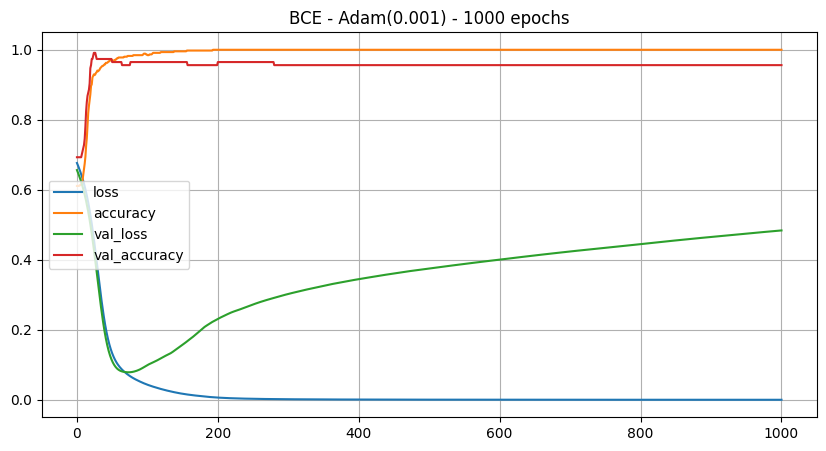

In [47]:
pd.DataFrame(metrics).plot(figsize=(10, 5))
plt.title(f"BCE - Adam({lr}) - {n_epochs} epochs")
plt.grid("on")

Text(0.5, 0.98, 'BCE - Adam(0.001) - 1000 epochs')

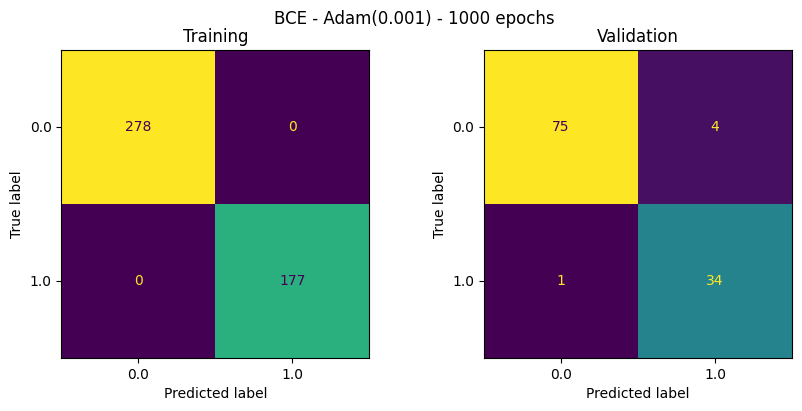

In [48]:
plot_confusion_matrix(y_preds, y_val_preds)
plt.suptitle(f"BCE - Adam({lr}) - {n_epochs} epochs")